In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2


#initiate connection to the database
connct = psycopg2.connect('dbname=WhiskyAdvocate user= postgres password = [redacted] host = 127.0.0.1 port=5432')

# Using Psycopg2 and SQL Queries to Test My Database and Answer Questions

What are the Names and Scores of The Reviewer's favorite Bourbons under $200?

In [13]:
#write a query to answer this question

bourb_query = '''SELECT whiskey_stats.name, whiskey_stats.score, whiskey_stats.price_usd, categories.category
                 FROM whiskey_stats
                 INNER JOIN categories
                 ON categories.category_id = whiskey_stats.category_id
                 WHERE categories.category = 'Bourbon/Tennessee' AND whiskey_stats.price_usd < 200 AND whiskey_stats.score > 90
                 ORDER BY (whiskey_stats.score) DESC;'''

fave_bourbs = pd.read_sql(bourb_query, connct)

print(f'there are {len(fave_bourbs)} that fit these criteria')
fave_bourbs.head()

there are 310 that fit these criteria


,name,score,price_usd,category
0,Four Roses Limited Edition Small Batch (2013 R...,97,85.0,Bourbon/Tennessee
1,Parker's Heritage Collection 'Golden Anniversa...,97,150.0,Bourbon/Tennessee
2,Jefferson's Presidential Select (Batch #1) 199...,96,90.0,Bourbon/Tennessee
3,Four Roses Limited Edition Small Batch (2012 R...,96,90.0,Bourbon/Tennessee
4,William Larue Weller 67.4%,96,65.0,Bourbon/Tennessee


What are the Names and Scores of The Reviewer's favorite single malt scotches under $200?

In [69]:
sms_query = '''SELECT whiskey_stats.name, whiskey_stats.score, whiskey_stats.price_usd, categories.category
                 FROM whiskey_stats
                 INNER JOIN categories
                 ON categories.category_id = whiskey_stats.category_id
                 WHERE categories.category = 'Single Malt Scotch' AND whiskey_stats.price_usd < 200 AND whiskey_stats.score > 90
                 ORDER BY (whiskey_stats.score) DESC;'''

fave_sms = pd.read_sql(sms_query, connct)

print(f'there are {len(fave_sms)} that fit these criteria')
fave_sms.head()

there are 214 that fit these criteria


,name,score,price_usd,category
0,Kilchoman Machir Bay Cask-Strength Festive Edi...,95,75.0,Single Malt Scotch
1,Ardbeg Corryvreckan 57.1%,95,90.0,Single Malt Scotch
2,Highland Park 18 year old 43%,94,112.0,Single Malt Scotch
3,Arran Sherry Cask The Bodega Cask-Strength 55.8%,94,80.0,Single Malt Scotch
4,Lagavulin 12 year old (Diageo Special Release...,94,130.0,Single Malt Scotch


Suppose I want a smokey and complex whisky for my mother's birthday party. What would be some good choices according to my score data?

In [63]:
scw_query = '''SELECT whiskey_stats.name, whiskey_stats.score, whiskey_stats.price_usd, categories.category
                FROM whiskey_stats
                INNER JOIN categories
                ON categories.category_id = whiskey_stats.category_id
                INNER JOIN vector_description
                ON vector_description.whiskey_id = whiskey_stats.whiskey_id
                WHERE whiskey_stats.price_usd < 200 AND vector_description.smoke > 0 AND vector_description.complex > 0
                ORDER BY (whiskey_stats.score) DESC;'''

fave_scw = pd.read_sql(scw_query, connct)

print(f'there are {len(fave_scw)} that fit these criteria')
fave_scw.head()

there are 34 that fit these criteria


,name,score,price_usd,category
0,Compass Box Flaming Heart (10th Anniversary bo...,95,105.0,Blended Malt Scotch Whisky
1,Lagavulin 12 year old (Diageo Special Releases...,94,109.0,Single Malt Scotch
2,Yamazaki 18 year old 43%,93,100.0,Japanese Whisky
3,Highland Park 21 year old 47.5%,93,100.0,Single Malt Scotch
4,Belle Meade 10 year old Sherry Cask Finish 53.2%,93,100.0,Bourbon/Tennessee


How many whiskeys in each category have the reviewers reviewed?

In [67]:
Au_stats_query = ''' SELECT authors.author, categories.category, count(categories.category_id)
                        FROM authors
                        INNER JOIN reviews
                        ON authors.author_id = reviews.author_id
                        INNER JOIN whiskey_stats
                        ON reviews.whiskey_id = whiskey_stats.whiskey_id
                        INNER JOIN categories
                        ON whiskey_stats.category_id = categories.category_id
                        GROUP BY categories.category, authors.author
                        ORDER BY authors.author, count(categories.category_id) DESC;'''

aut_rev_stat = pd.read_sql(Au_stats_query, connct)


aut_rev_stat

,author,category,count
0,Adam Polonski,Craft Whiskey,7
1,Adam Polonski,Rye Whiskey,4
2,Adam Polonski,Single Malt American Whiskey,3
3,Adam Polonski,Multinational Whisky,3
4,Adam Polonski,Bourbon/Tennessee,1
...,...,...,...
222,Ted Simmons,Rye Whiskey,9
223,Ted Simmons,American Whiskey,7
224,Ted Simmons,Blended American Whiskey,2
225,Ted Simmons,Blended Scotch Whisky,1


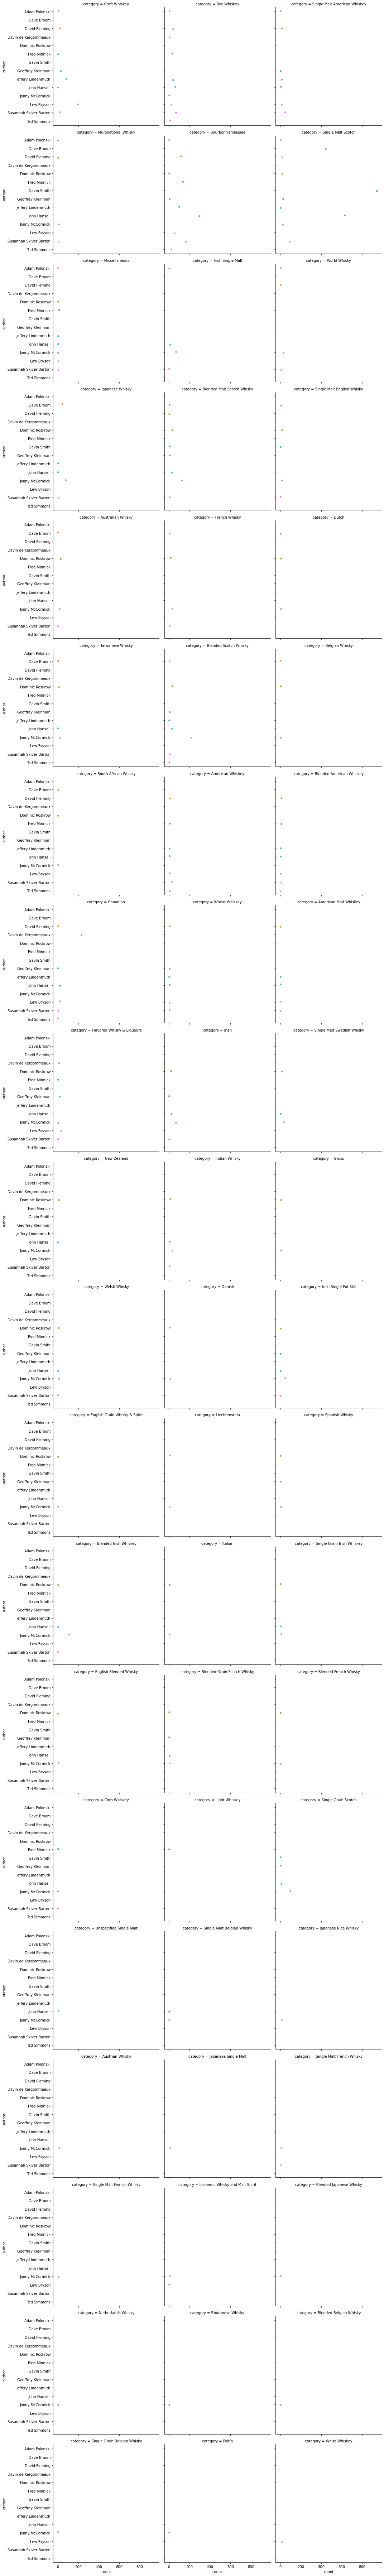

In [61]:
#plot the above dataframe

sns.catplot(x = 'count', y = 'author', col = 'category', col_wrap = 3, data = aut_rev_stat, height = 5, aspect = 1, 
            orient = 'h')

#plt.savefig("desktop/independant_projects/whiskey_data_scraper/reviewer_map.png")
plt.show()

Assuming each reviewer was required to pay full price for a bottle (or sales unit) of each whiskey they reviewed, how much would they have spent on whiskey?

In [36]:
au_expense_query = '''SELECT authors.author, sum(whiskey_stats.price_usd) AS total_expense
                        FROM authors
                        INNER JOIN reviews
                        ON authors.author_id = reviews.author_id
                        INNER JOIN whiskey_stats
                        ON reviews.whiskey_id = whiskey_stats.whiskey_id
                        GROUP BY authors.author
                        ORDER BY total_expense DESC;'''

aut_rev_stat = pd.read_sql(au_expense_query, connct)

aut_rev_stat

,author,total_expense
0,Gavin Smith,1049411.0
1,Dave Broom,446390.0
2,John Hansell,302395.0
3,Jonny McCormick,293530.0
4,Susannah Skiver Barton,41433.0
5,David Fleming,26831.0
6,Dominic Roskrow,26006.0
7,Fred Minnick,20281.0
8,Jeffery Lindenmuth,20192.0
9,Lew Bryson,19087.0


which reviewers review the bougiest whiskies?

In [38]:
au_price_query = '''SELECT authors.author, avg(whiskey_stats.price_usd) AS average_price
                        FROM authors
                        INNER JOIN reviews
                        ON authors.author_id = reviews.author_id
                        INNER JOIN whiskey_stats
                        ON reviews.whiskey_id = whiskey_stats.whiskey_id
                        GROUP BY authors.author
                        ORDER BY average_price DESC;'''

aut_price_stat = pd.read_sql(au_price_query, connct)

aut_price_stat

,author,average_price
0,Gavin Smith,1103.481598
1,Dave Broom,882.193676
2,John Hansell,265.724956
3,Jonny McCormick,257.482456
4,David Fleming,113.210970
5,Dominic Roskrow,108.811715
6,Fred Minnick,107.306878
7,Susannah Skiver Barton,86.318750
8,Geoffrey Kleinman,83.365591
9,Jeffery Lindenmuth,81.092369


Is the average price of a reviewers bottle correlated to their average score?

In [64]:
au_price_q2 = '''SELECT authors.author, avg(whiskey_stats.price_usd) AS average_price, avg(whiskey_stats.score) AS average_score
                        FROM authors
                        INNER JOIN reviews
                        ON authors.author_id = reviews.author_id
                        INNER JOIN whiskey_stats
                        ON reviews.whiskey_id = whiskey_stats.whiskey_id
                        GROUP BY authors.author
                        ORDER BY average_price DESC;'''

aut_price_stat2 = pd.read_sql(au_price_q2, connct)

aut_price_stat2

,author,average_price,average_score
0,Gavin Smith,1103.481598,87.858044
1,Dave Broom,882.193676,85.974308
2,John Hansell,265.724956,87.358524
3,Jonny McCormick,257.482456,88.434211
4,David Fleming,113.210970,89.400844
5,Dominic Roskrow,108.811715,86.129707
6,Fred Minnick,107.306878,86.835979
7,Susannah Skiver Barton,86.318750,89.187500
8,Geoffrey Kleinman,83.365591,83.666667
9,Jeffery Lindenmuth,81.092369,87.927711


The correlation is 0.05464508167075843


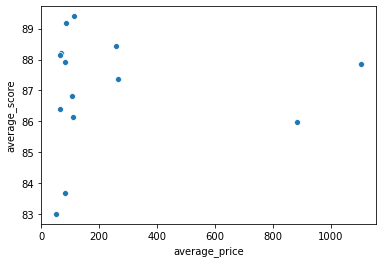

In [66]:
#plot that data

import scipy.stats as st

r_val = st.pearsonr(aut_price_stat2['average_price'], aut_price_stat2['average_score'])

sns.scatterplot(x = 'average_price', y = 'average_score', data = aut_price_stat2 )

print(f'The correlation is {r_val[0]}')
plt.show()

What are the scores and vector reviews for different glen livet whiskies?

In [87]:
livet_q = '''SELECT whiskey_stats.name, whiskey_stats.score, whiskey_stats.price_usd, vector_description.*
                FROM whiskey_stats
                INNER JOIN vector_description
                ON whiskey_stats.whiskey_id = vector_description.whiskey_id
                WHERE whiskey_stats.name LIKE '%livet%';'''

livets= pd.read_sql(livet_q, connct)
pd.set_option('display.max_columns', 100)
livets.head() 

,name,score,price_usd,oak,vanilla,sweet,chocolate,fruit,spice,orange,pepper,cinnamon,smoke,caramel,sherry,toffee,honey,apple,citrus,ginger,peat,lemon,dry,leather,sugar,cherry,toasted,tobacco,licorice,nuts,floral,bitter,complex,subtle,coconut,whiskey_id
0,Glenlivet Cellar Collection 1969 vintage 50.8%,96,750.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3500
1,Glenlivet Cellar Collection 1973 vintage 49%,95,1250.0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3512
2,Gordon & MacPhail Private Collection 1954 (dis...,93,15000.0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3603
3,Glenlivet Cellar Collection 1964 vintage 44.7%,93,2000.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3634
4,Glenlivet Archive 21 year old 43%,93,100.0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3635


In [86]:
# Same Query for Johnny Walker

walker_q = '''SELECT whiskey_stats.name, whiskey_stats.score, whiskey_stats.price_usd, vector_description.*
                FROM whiskey_stats
                INNER JOIN vector_description
                ON whiskey_stats.whiskey_id = vector_description.whiskey_id
                WHERE whiskey_stats.name LIKE 'Johnnie Walker%'
                ORDER BY whiskey_stats.score DESC;'''

walker= pd.read_sql(walker_q, connct)

walker.head() 

,name,score,price_usd,oak,vanilla,sweet,chocolate,fruit,spice,orange,pepper,cinnamon,smoke,caramel,sherry,toffee,honey,apple,citrus,ginger,peat,lemon,dry,leather,sugar,cherry,toasted,tobacco,licorice,nuts,floral,bitter,complex,subtle,coconut,whiskey_id
0,Johnnie Walker Blue Label 40%,97,225.0,0,1,0,0,0,0,1,0,0,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,486
1,Johnnie Walker Blue Anniversary 60%,95,3500.0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,491
2,Johnnie Walker Blue Label Legendary Eight 43.8%,94,350.0,0,1,1,1,1,1,0,2,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,499
3,Johnnie Walker The Casks Edition 55.8%,94,300.0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,497
4,Johnnie Walker Blue Label Ghost and Rare Port ...,94,350.0,0,0,0,1,0,1,1,0,0,2,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,496
